In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
import healpy as hp
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools
from dipole import dipole_map, spherical_to_cartesian

In [4]:
NSIDE = 32
NPIX = hp.nside2npix(NSIDE)

In [14]:
# CMB dipole as test case
cmb_dipamp = 0.007
cmb_dipdir = SkyCoord(264, 48, unit=u.deg, frame='galactic')
amps = np.array([0., *spherical_to_cartesian(r=cmb_dipamp,
                                             theta=np.pi/2-cmb_dipdir.b.rad,
                                             phi=cmb_dipdir.l.rad)])
expected_map = dipole_map(amps, NSIDE) # match NSIDE with Quaia map

In [39]:
def plot_marker(l, b, **kwargs):
    l = l.to(u.rad) if isinstance(l, u.Quantity) else (l * u.deg).to(u.rad)
    b = b.to(u.rad) if isinstance(b, u.Quantity) else (b * u.deg).to(u.rad)
    theta = Angle((np.pi/2 * u.rad) - b)
    phi = Angle(l)
    hp.newprojplot(theta, phi.wrap_at(np.pi * u.rad), **kwargs)

In [40]:
cmb_dipdir

<SkyCoord (Galactic): (l, b) in deg
    (264., 48.)>

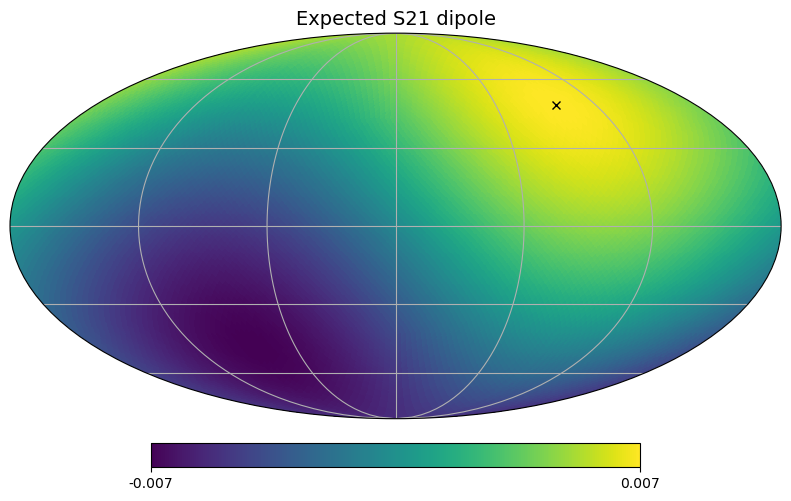

In [42]:
hp.projview(expected_map, min=-.007, max=.007, title='Expected S21 dipole', graticule=True)
plot_marker(cmb_dipdir.l, cmb_dipdir.b, marker='x', c='k')

In [43]:
amps = np.array([0., *spherical_to_cartesian(r=cmb_dipamp,
                                             theta=np.pi/2-cmb_dipdir.icrs.dec.rad,
                                             phi=cmb_dipdir.icrs.ra.rad)])
expected_map = dipole_map(amps, NSIDE) # match NSIDE with Quaia map

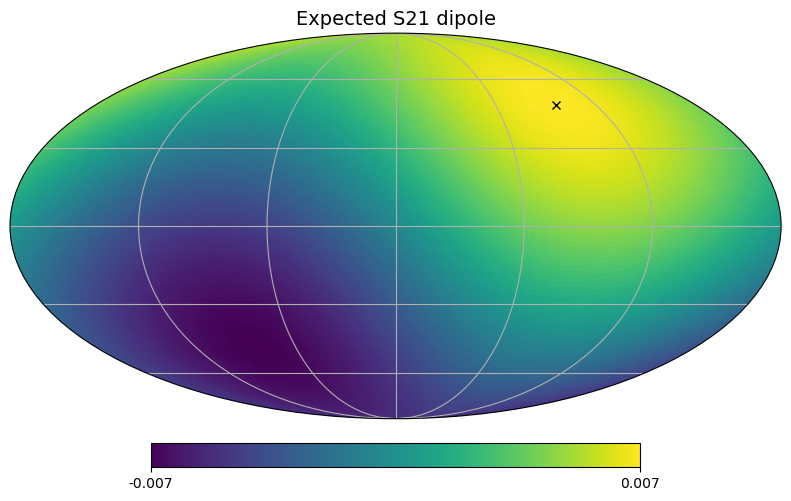

In [46]:
hp.projview(expected_map, coord=['C','G'], min=-.007, max=.007, title='Expected S21 dipole', graticule=True)
plot_marker(cmb_dipdir.l, cmb_dipdir.b, marker='x', c='k')